# Stock Portfolio Recommdendations

## Objective

### Creating a portfolio out of Nifty50 Stocks
The NIFTY 50 is a benchmark Indian stock market index that represents the weighted average of 50
of the largest Indian companies listed on the National Stock Exchange.
Objectives:
1. Create an active stock selection strategy. (Main Objective)
2. Compare the performance of the strategy with a benchmark.
3. Summarize the performance of active strategy and compare it with benchmark.
4. Create and host an app to present the above.
Use your OOP (Object Oriented Programming) skills to complete the task. Each functionality
explained above except hosting an app should be the part of your main class.
Start by creating a class Stock and historical prices of each stock should be class properties. When
you instantiate a class it should download the historical prices and compute necessary properties.
Method of this class should be:
1. CurPrice(curDate) – Which gives the closing price of the date curDate.
2. NDayRet(N,curDate) – Which gives the N-day returns as on the curDate. (N=5 will give 5-day
return)
3. DailyRet(curDate) - Which gives the daily returns on curDate.
4. Last30daysPrice(curDate) – Which gives the array of last 30 days prices.
1. Benchmark Strategy:
Our Benchmark is going to be Nifty50 index itself. Compare your active stock selection strategy.
2. Active stock selection strategy:
Your task involves creating an investment strategy where, at the end of each month, the
performance of each stock in the previous month is assessed. The criterion for selection is
positive returns. For instance, on March 31st of a given year, the 30-day returns of all fifty
stocks will be examined, and only those with positive returns will be included in the portfolio.
This portfolio will be maintained until April 30th, when a revaluation will occur based on the
same rule for the upcoming month. This process will be repeated monthly.
3. Summarize the performance:
Get the following performance metrics for Nifty Index, Benchmark Allocation & Sample Strategy
a. CAGR (%): ((𝑉𝑓𝑖𝑛𝑎𝑙
𝑉𝑏𝑒𝑔𝑖𝑛
)
1
𝑡
− 1) ∗ 100 ;
𝑉𝑓𝑖𝑛𝑎𝑙 : 𝑉𝑎𝑙𝑢𝑒 𝑜𝑛 𝑓𝑖𝑛𝑎𝑙 𝑑𝑎𝑦, 𝑉𝑏𝑒𝑔𝑖𝑛: 𝑉𝑎𝑙𝑢𝑒 𝑜𝑛 𝑏𝑒𝑔𝑖𝑛𝑖𝑛𝑔 𝑑𝑎𝑦, 𝑡: 𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑦𝑒𝑎𝑟𝑠
b. Volatility (%): (√252 ∗ (𝑠𝑡𝑎𝑛𝑑𝑎𝑟𝑑 𝑑𝑒𝑣𝑖𝑎𝑡𝑖𝑜𝑛(𝑑𝑎𝑖𝑙𝑦 𝑟𝑒𝑡𝑢𝑟𝑛𝑠)) ∗ 100
c. Sharpe Ratio: (√252 ∗ 𝑚𝑒𝑎𝑛 (𝑑𝑎𝑖𝑙𝑦 𝑟𝑒𝑡𝑢𝑟𝑛𝑠)
𝑆𝑡𝑎𝑛𝑑𝑎𝑟𝑑 𝑑𝑒𝑣𝑖𝑎𝑡𝑖𝑜𝑛(𝑑𝑎𝑖𝑙𝑦 𝑟𝑒𝑡𝑢𝑟𝑛𝑠))
𝑑𝑎𝑖𝑙𝑦 𝑟𝑒𝑡𝑢𝑟𝑛𝑠: ( 𝑉𝑡
𝑉𝑡−1
− 1) ; 𝑉𝑡: 𝑉𝑎𝑙𝑢𝑒 𝑜𝑛 𝑑𝑎𝑦 (𝑡), 𝑉𝑡−1: 𝑉𝑎𝑙𝑢𝑒 𝑜𝑛 𝑑𝑎𝑦 (𝑡 − 1)
4. App to host the performance:
Create & Host an app to which will have the following features.
Need to take the following as inputs:
1. Start date and end date of simulation
2. Number of days to measure the performance for stock selection required for the sample
strategy. ( We have described it to use 30 days returns but it can be generalized to have N
days returns.)
3. Initial Equity
Need to display the following:
1. Equity Curves of Nifty index, benchmark, and the Sample strategy for the given period in a
single plot.
2. Stocks that are selected for the sample strategy.
3. Performance metrics for all the 3 stocks

## 1. Obtaining Nifty50 ticker list from wikipedia

In [5]:
# Defining Imports
import pandas as pd
import yfinance as yf
import sqlite3
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

In [6]:
nifty_50_symbols = pd.read_csv("https://huggingface.co/spaces/pvanand/portfolio/raw/main/nifty50-stock-tickers.csv").Symbol.to_list()
nifty_50_symbols

['ADANIENT',
 'ADANIPORTS',
 'APOLLOHOSP',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BPCL',
 'BHARTIARTL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'INDUSINDBK',
 'INFY',
 'ITC',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'LTIM',
 'M&M',
 'MARUTI',
 'NESTLEIND',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SBIN',
 'SUNPHARMA',
 'TATAMOTORS',
 'TATASTEEL',
 'TCS',
 'TATACONSUM',
 'TECHM',
 'TITAN',
 'ULTRACEMCO',
 'UPL',
 'WIPRO']

# 2. Fetching data from Yahoo Finance and storing it in a SQLite database

This step helps in faster retrieval of data when further analysis is required Also by using SQLite, only required data (specific date range) is loaded into memmory.

In [7]:
# Function to fetch data from Yahoo Finance
def fetch_data(symbols, start_date, end_date):
    for symbol in symbols:
        data = yf.download(symbol+'.NS', start=start_date, end=end_date)
        data.to_sql(symbol, conn, if_exists='replace', index=True)

# Create a SQLite database
conn = sqlite3.connect('nifty50_stock_data.db')

# Example: Fetching data for some symbols
symbols = nifty_50_symbols  # Add more symbols as needed
fetch_data(symbols, '2000-01-01', pd.to_datetime('today').strftime('%Y-%m-%d'))
# last updated on 2024-01-07
conn.close()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Storing nifty50 index data in the same database

In [8]:
import yfinance as yf
import sqlite3
import pandas as pd

def fetch_data(start_date, end_date):
  data = yf.download('^NSEI', start=start_date, end=end_date)
  data.to_sql("NIFTY50", conn, if_exists='replace', index=True)

# Create a SQLite database
conn = sqlite3.connect('/content/nifty50_stock_data.db')

fetch_data('2000-01-01', pd.to_datetime('today').strftime('%Y-%m-%d'))
# last updated on 2024-01-07
conn.close()

[*********************100%%**********************]  1 of 1 completed


## 3. Selecting stocks and building a strategy

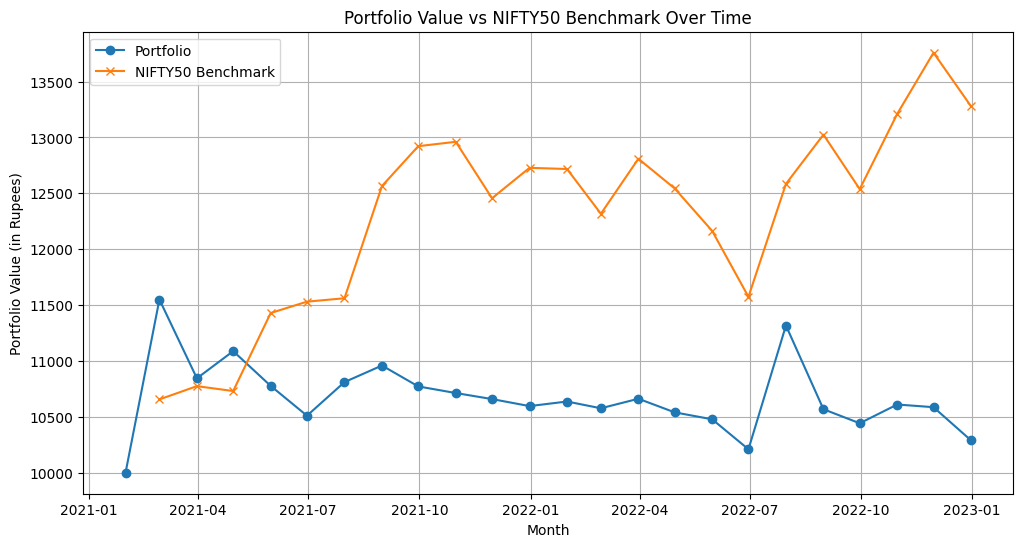

('portfolio_chart.png', 'CAGR: 1.44%')

In [10]:

class Stock:
    def __init__(self, symbol, db_path, start_date, end_date):
        self.symbol = symbol
        self.db_path = db_path
        self.start_date = start_date
        self.end_date = end_date
        self.prices = self._download_prices()

    def _download_prices(self):
        conn = sqlite3.connect(self.db_path)
        query = f"SELECT Date, Close FROM `{self.symbol}` WHERE Date BETWEEN '{self.start_date}' AND '{self.end_date}'"
        prices = pd.read_sql_query(query, conn, parse_dates=['Date'])
        prices.set_index('Date', inplace=True)
        return prices

    def CurPrice(self, curDate):
        return self.prices.loc[curDate, 'Close'] if curDate in self.prices.index else None

    def NDayRet(self, N, curDate):
        if curDate not in self.prices.index:
            return None
        start_date = self.prices.index[self.prices.index.get_loc(curDate) - N]
        start_price = self.prices.loc[start_date, 'Close']
        end_price = self.prices.loc[curDate, 'Close']
        return (end_price - start_price) / start_price

    def DailyRet(self, curDate):
        if curDate not in self.prices.index:
            return None
        previous_date = self.prices.index[self.prices.index.get_loc(curDate) - 1]
        previous_price = self.prices.loc[previous_date, 'Close']
        current_price = self.prices.loc[curDate, 'Close']
        return (current_price - previous_price) / previous_price

    def Last30daysPrice(self, curDate):
        end_loc = self.prices.index.get_loc(curDate) + 1
        start_loc = max(0, end_loc - 30)
        return self.prices.iloc[start_loc:end_loc]['Close'].values




  # Assuming the Stock class and other necessary imports are already defined

def calculate_portfolio(start_date, end_date, investment_amount):
    # Initialize variables
    db_path = 'nifty50_stock_data.db'  # Replace with the correct path
    nifty_50_symbols = pd.read_csv("https://huggingface.co/spaces/pvanand/portfolio/raw/main/nifty50-stock-tickers.csv").Symbol.to_list()  # Replace with actual NIFTY 50 stock symbols

    initial_investment = investment_amount
    stocks = {symbol: Stock(symbol, db_path, start_date, end_date) for symbol in nifty_50_symbols}

    # DataFrame to track the monthly percentage change for each stock
    monthly_pct_change = pd.DataFrame()
    daily_pct_change = pd.DataFrame()

    # Calculate the monthly and daily percentage change for each stock
    for symbol, stock_obj in stocks.items():
        daily_pct_change[symbol] = stock_obj.prices['Close'].pct_change()
        monthly_pct_change[symbol] = stock_obj.prices['Close'].resample('M').last().pct_change()

    monthly_pct_change.fillna(0, inplace=True)

    # Starting the portfolio with equal investment in each stock
    num_stocks = len(nifty_50_symbols)
    investment_per_stock = initial_investment / num_stocks
    stock_investments = {stock: investment_per_stock for stock in nifty_50_symbols}

    portfolio_value = [initial_investment]

    for month in monthly_pct_change.index:
        month_performance = monthly_pct_change.loc[month]
        total_portfolio_value = sum(stock_investments.values())
        positive_stocks = [stock for stock, pct_change in month_performance.items() if pct_change > 0]

        if positive_stocks:
            investment_per_positive_stock = total_portfolio_value / len(positive_stocks)
            stock_investments = {stock: investment_per_positive_stock if stock in positive_stocks else 0 for stock in nifty_50_symbols}

        month_gain = sum(investment_per_positive_stock * month_performance[stock] for stock in positive_stocks if pd.notna(month_performance[stock]))
        current_portfolio_value = total_portfolio_value + month_gain
        portfolio_value.append(current_portfolio_value)

    adjusted_portfolio_value = portfolio_value[1:]

    # Create Stock object for NIFTY50
    nifty_50_stock = Stock('NIFTY50', db_path, start_date, end_date)

    # Calculate monthly returns for NIFTY50
    nifty_50_monthly_return = nifty_50_stock.prices['Close'].resample('M').last().pct_change()

    # Initialize NIFTY50 benchmark portfolio value list
    nifty_50_portfolio_value = [initial_investment]

    # Calculate NIFTY50 benchmark portfolio value over time
    for return_pct in nifty_50_monthly_return[1:]:
        nifty_50_portfolio_value.append(nifty_50_portfolio_value[-1] * (1 + return_pct))

    # Adjust lengths of the NIFTY50 portfolio value to match the dates
    adjusted_nifty_50_portfolio_value = nifty_50_portfolio_value[1:]

    # Calculate CAGR
    final_value = portfolio_value[-1]
    num_years = (datetime.strptime(end_date, '%Y-%m-%d') - datetime.strptime(start_date, '%Y-%m-%d')).days / 365.25
    cagr = ((final_value / initial_investment) ** (1 / num_years)) - 1

    return adjusted_portfolio_value, adjusted_nifty_50_portfolio_value, cagr, monthly_pct_change, nifty_50_monthly_return


def plot_chart(start_date, end_date, investment_amount):
  # Receive additional variables
  adjusted_portfolio_value, adjusted_nifty_50_portfolio_value, cagr, monthly_pct_change, nifty_50_monthly_return = calculate_portfolio(start_date, end_date, investment_amount)

  # Plotting the chart
  plt.figure(figsize=(12, 6))
  plt.plot(nifty_50_monthly_return.index, adjusted_portfolio_value, marker='o', label='Portfolio')
  plt.plot(nifty_50_monthly_return[1:].index, adjusted_nifty_50_portfolio_value, marker='x', label='NIFTY50 Benchmark')
  plt.title('Portfolio Value vs NIFTY50 Benchmark Over Time')
  plt.xlabel('Month')
  plt.ylabel('Portfolio Value (in Rupees)')
  plt.legend()
  plt.grid(True)
  plt.savefig('portfolio_chart.png')
  plt.show()
  plt.close()

  return 'portfolio_chart.png', f"CAGR: {cagr*100:.2f}%"

plot_chart('2021-01-01', '2022-12-31', 10000)


